<a href="https://colab.research.google.com/github/Udemebilly/Asian-Project/blob/master/1visualizationassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np

%matplotlib inline

df = pd.read_csv(r'/content/netflix_titles.csv', encoding='utf8')
df1 = df


#import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings 
warnings.filterwarnings('ignore')



df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [3]:
df.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

# New section

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


In [7]:
# here we directly see the columns having missing values 

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
#Gives a better visualization of the missing values

In [10]:
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df)*100
    if null_rate > 0 :
        print( "{}'s null rate: {}%".format(i, round(null_rate, 2)))

director's null rate: 30.68%
cast's null rate: 9.22%
country's null rate: 6.51%
date_added's null rate: 0.13%
rating's null rate: 0.09%


In [11]:
print("Percentage Of Missing Values")
Perc_Of_Missing=df.isna().sum()/len(df)*100
Perc_Of_Missing[Perc_Of_Missing!=0]

Percentage Of Missing Values


director      30.679337
cast           9.220496
country        6.510851
date_added     0.128419
rating         0.089893
dtype: float64

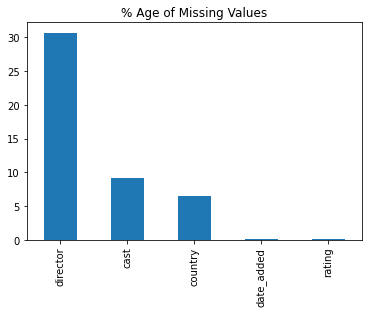

In [12]:
only_missing=Perc_Of_Missing[Perc_Of_Missing!=0]
only_missing.plot(kind="bar")
plt.title("% Age of Missing Values")
plt.show()

In [13]:

##drop(cast,director,show id,description) 

In [14]:
df.drop("cast",axis=1,inplace=True)
df.drop("director",axis=1,inplace=True)
df.drop("show_id",axis=1,inplace=True)
df.drop("description",axis=1,inplace=True)

In [ ]:
#we fill the missing column for rating and country with 0

In [71]:
for col_name in df.columns: 
    print ("column:",col_name,".Missing:",sum(df[col_name].isnull()))

column: show_id .Missing: 0
column: type .Missing: 0
column: title .Missing: 0
column: director .Missing: 2389
column: cast .Missing: 718
column: country .Missing: 507
column: date_added .Missing: 10
column: release_year .Missing: 0
column: rating .Missing: 7
column: duration .Missing: 0
column: listed_in .Missing: 0
column: description .Missing: 0


In [72]:
df["country"]=df["country"].fillna(df["country"].mode()[0])
df["rating"]=df["rating"].fillna(df["rating"].mode()[0])

In [74]:
for col_name in df.columns: 
    print ("column:",col_name,".Missing:",sum(df[col_name].isnull()))

column: show_id .Missing: 0
column: type .Missing: 0
column: title .Missing: 0
column: director .Missing: 2389
column: cast .Missing: 718
column: country .Missing: 0
column: date_added .Missing: 10
column: release_year .Missing: 0
column: rating .Missing: 0
column: duration .Missing: 0
column: listed_in .Missing: 0
column: description .Missing: 0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7787 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [18]:
#Number of unique values found in only country

In [77]:
df['country'].nunique()

681

In [20]:
#df['country'] = df ['country'].fillna(df['country'].mode()[0])

In [78]:
#we work on the values in country
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object

In [79]:
df['principal_country'].nunique()

81

In [24]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   show_id            7787 non-null   object
 1   type               7787 non-null   object
 2   title              7787 non-null   object
 3   director           5398 non-null   object
 4   cast               7069 non-null   object
 5   country            7787 non-null   object
 6   date_added         7777 non-null   object
 7   release_year       7787 non-null   int64 
 8   rating             7787 non-null   object
 9   duration           7787 non-null   object
 10  listed_in          7787 non-null   object
 11  description        7787 non-null   object
 12  principal_country  7787 non-null   object
dtypes: int64(1), object(12)
memory usage: 791.0+ KB


In [26]:
# Hooray!! Dataset has been cleaned!

In [81]:
val = df['type'].value_counts().index
cnt = df['type'].value_counts().values

fig = go.Figure([go.Bar(x=val, y=cnt, marker_color='darkturquoise')])
fig.update_layout(title_text='Netflix Sources Distribution', title_x=0.5)
fig.show()

In [28]:
#There are obviously more movies than TV shows on Netflix

(-1.2493015905732927,
 1.2459835352546422,
 -1.207753237409533,
 1.1936665492525396)

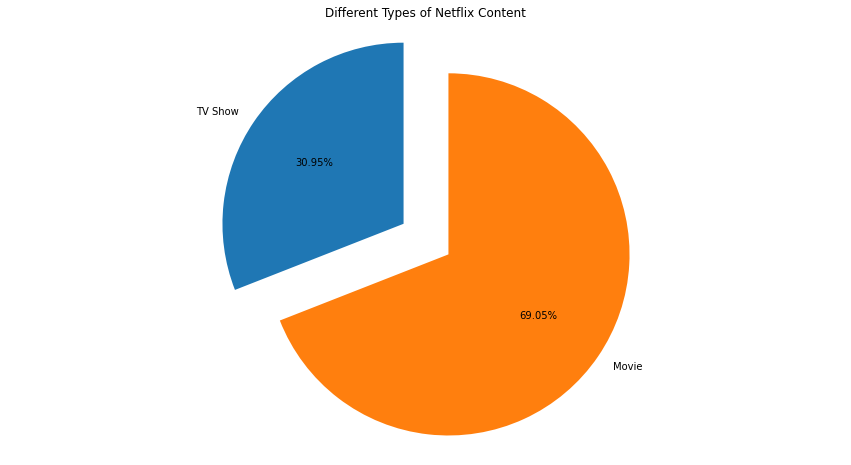

In [82]:
plt.figure(figsize=(15,8))
label=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(), labels=label, explode=[0.15,0.15], 
        autopct='%1.2f%%', startangle=90)
plt.title('Different Types of Netflix Content')
plt.axis('equal')

In [83]:
director_shows = df[(df["type"] == 'TV Show')]
director_shows.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,principal_country
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Turkey
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",Poland
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,Mexico
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",United States


# New section

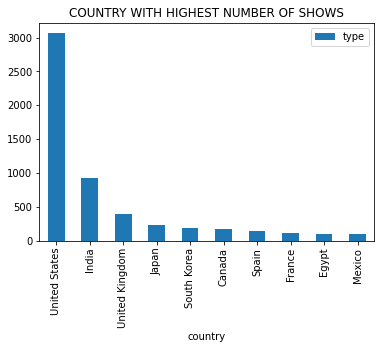

In [86]:
countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=False)
countries.head(10).plot(kind="bar")
plt.legend()
plt.title("COUNTRY WITH HIGHEST NUMBER OF SHOWS")
plt.show()

In [87]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'principal_country'],
      dtype='object')

In [34]:
#input missing values

In [88]:
df["country"]=df["country"].fillna(df["country"].mode()[0])
df["rating"]=df["rating"].fillna(df["rating"].mode()[0])

In [89]:
#Fix the date column

df[df.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,principal_country
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",United Kingdom
549,s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,United States
2263,s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,United States
2288,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,United States
2555,s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",Japan
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,United States,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,United States
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",United States
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",United States
5137,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",United States
6065,s6066,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",Australia


In [37]:
#we drop these rows because they are difficult to add, and they are only 10 rows

In [91]:
df=df[df["date_added"].notna()]
df.date_added

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7777, dtype: object

In [39]:
#check the data

In [40]:
df.isna().sum()

type                 0
title                0
country              0
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
principal_country    0
dtype: int64

In [92]:
#We make new columns based on Date

In [93]:
df["date_added"]=pd.DatetimeIndex(df.date_added)
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month

In [43]:
#based on the type


In [94]:
df["types"]=df["type"].map({"TV Show":0,"Movie":1})

In [95]:
#Based on rating

In [96]:
df["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [97]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [98]:
df["ratings_ages"]=df["rating"].replace(ratings_ages)

In [49]:
#############ANALYSIS###########

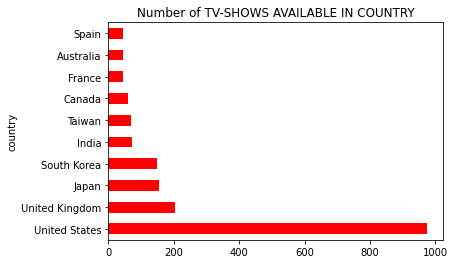

In [99]:
df.groupby(df["types"])["country"].value_counts()[0].head(10).plot(kind="barh",color="red")
plt.title("Number of TV-SHOWS AVAILABLE IN COUNTRY")
plt.show()

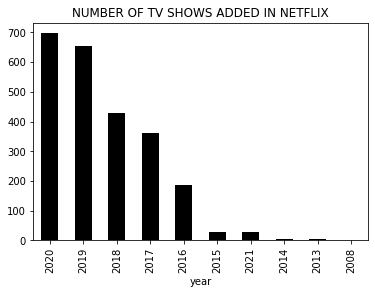

In [51]:
df.groupby(by=df["types"])["year"].value_counts()[0].plot(kind="bar",color="black")
plt.title("NUMBER OF TV SHOWS ADDED IN NETFLIX")
plt.show()

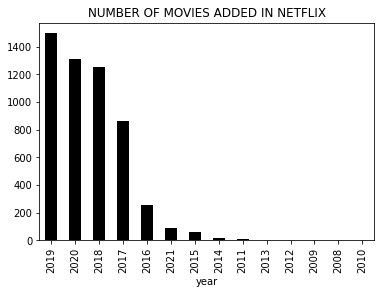

In [52]:
df.groupby(by=df["types"])["year"].value_counts()[1].plot(kind="bar",color="black")
plt.title("NUMBER OF MOVIES ADDED IN NETFLIX")
plt.show()

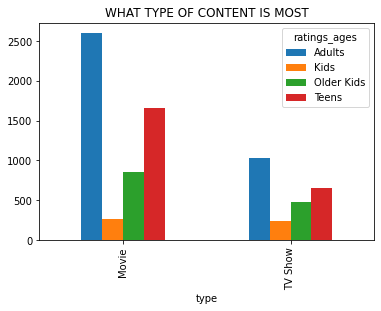

In [53]:
pd.crosstab(df["type"],df["ratings_ages"]).plot(kind="bar")
plt.title("WHAT TYPE OF CONTENT IS MOST")
plt.show()

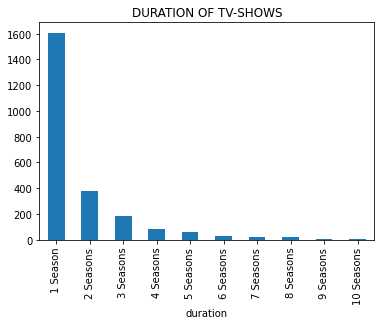

In [54]:
x=df.groupby(df["types"])["duration"].value_counts()[0]
x.head(10).plot(kind="bar")
plt.title("DURATION OF TV-SHOWS")
plt.show()

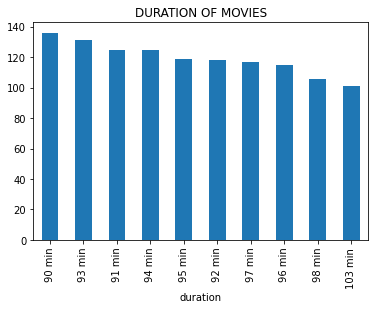

In [55]:
x=df.groupby(df["types"])["duration"].value_counts()[1]
x.head(10).plot(kind="bar")
plt.title("DURATION OF MOVIES")
plt.show()

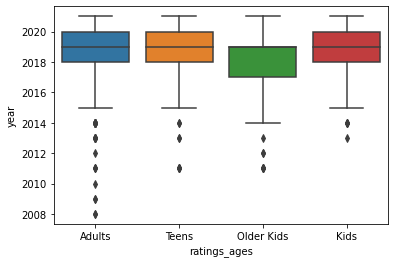

In [56]:
sns.boxplot(x="ratings_ages",y="year",data=df)

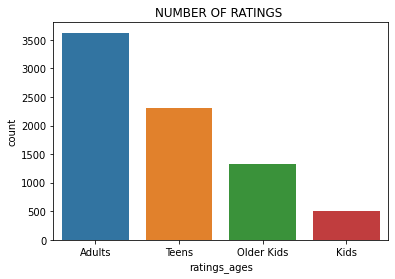

In [57]:
sns.countplot(x="ratings_ages",data=df)
plt.title("NUMBER OF RATINGS ")
plt.show()

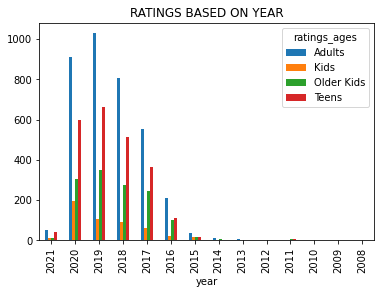

In [58]:
pd.crosstab(df["year"],df["ratings_ages"]).sort_values(by="year",ascending=False).plot(kind="bar")
plt.title("RATINGS BASED ON YEAR")
plt.show()

In [59]:
df.columns

Index(['type', 'title', 'country', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in', 'principal_country', 'year', 'month', 'types',
       'ratings_ages'],
      dtype='object')

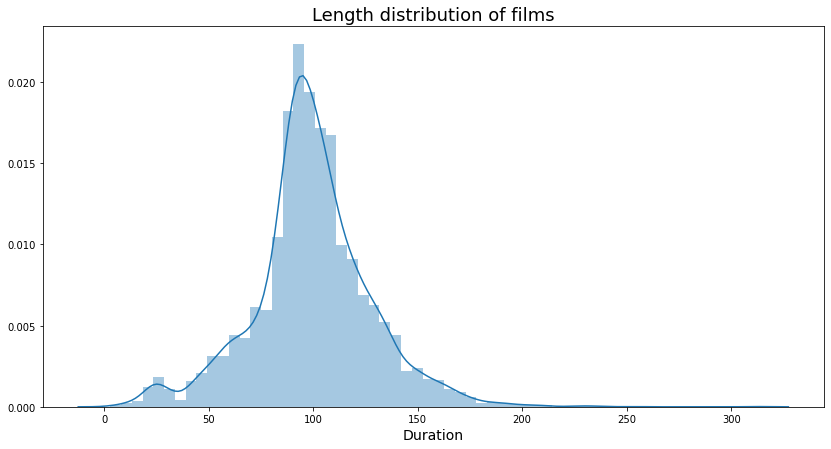

In [60]:
grp = df.groupby('type')
movie = grp.get_group('Movie')
movie['duration'] = [int(i.split(' ')[0]) for i in movie.duration.dropna()]

plt.figure(figsize=(14, 7))

sns.distplot(movie['duration'], bins=60).set(ylabel=None)

plt.title('Length distribution of films', fontsize=18)
plt.xlabel('Duration', fontsize=14)
plt.show()

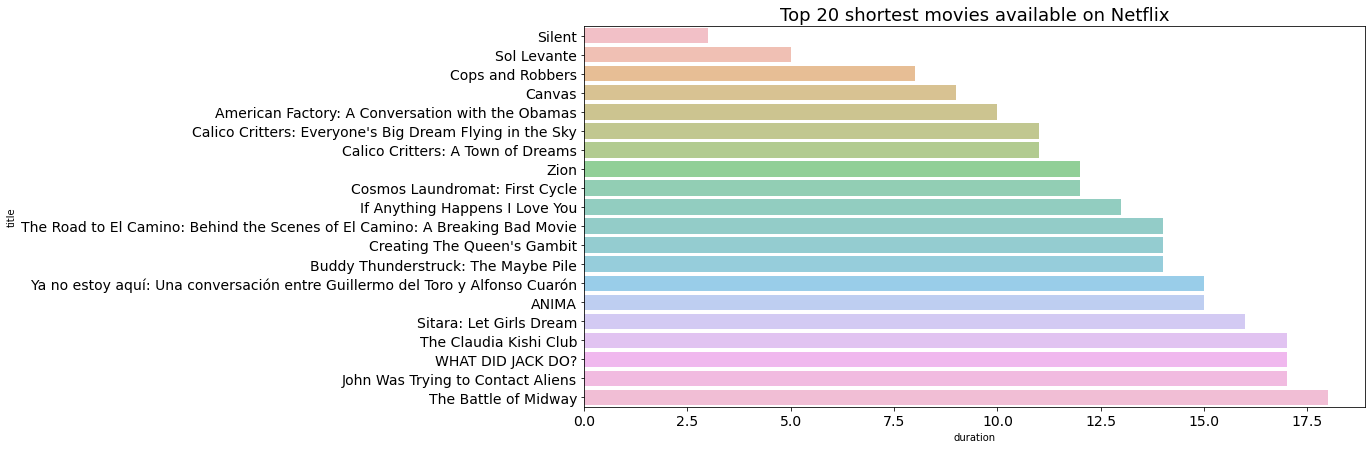

In [61]:
short = movie.sort_values('duration')[['title', 'duration']].iloc[:20]

plt.figure(figsize=(14,7))
plt.title('Top 20 shortest movies available on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=short['title'], x=short['duration'], alpha=0.6)

plt.show()

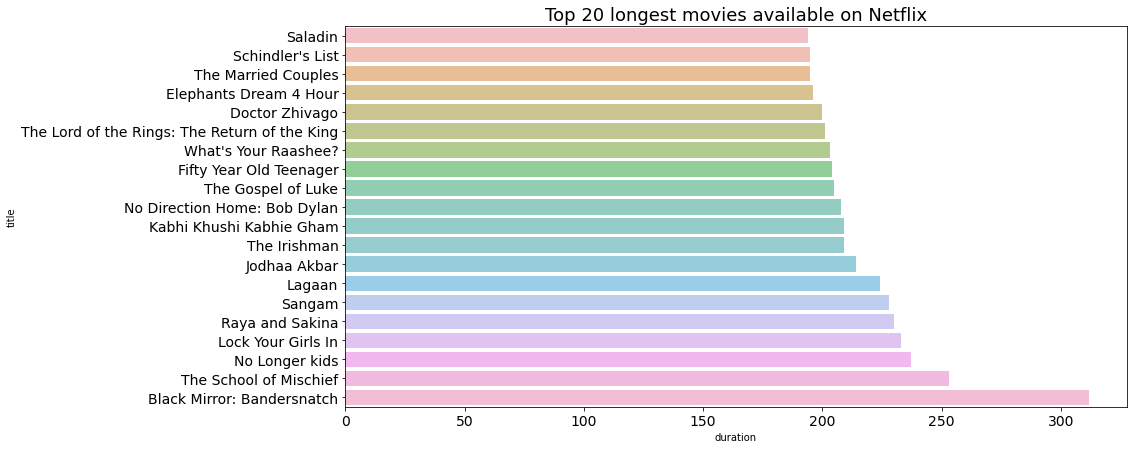

In [62]:
long = movie.sort_values('duration')[['title', 'duration']].iloc[-20:]

plt.figure(figsize=(14,7))
plt.title('Top 20 longest movies available on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=long['title'], x=long['duration'], alpha=0.6)

plt.show()

In [63]:
df.columns

Index(['type', 'title', 'country', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in', 'principal_country', 'year', 'month', 'types',
       'ratings_ages'],
      dtype='object')

In [64]:
countries = df['country'].value_counts()[df['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [65]:
plt.figure(figsize=(14, 7))

figure = px.pie(countries.sort_values(ascending=False).iloc[:20], values=countries.values, names=countries.index,
                title='Content quantity by country in percentage', color_discrete_sequence=px.colors.sequential.RdBu)
figure.show()

<Figure size 1008x504 with 0 Axes>

#Additional code for amusement!

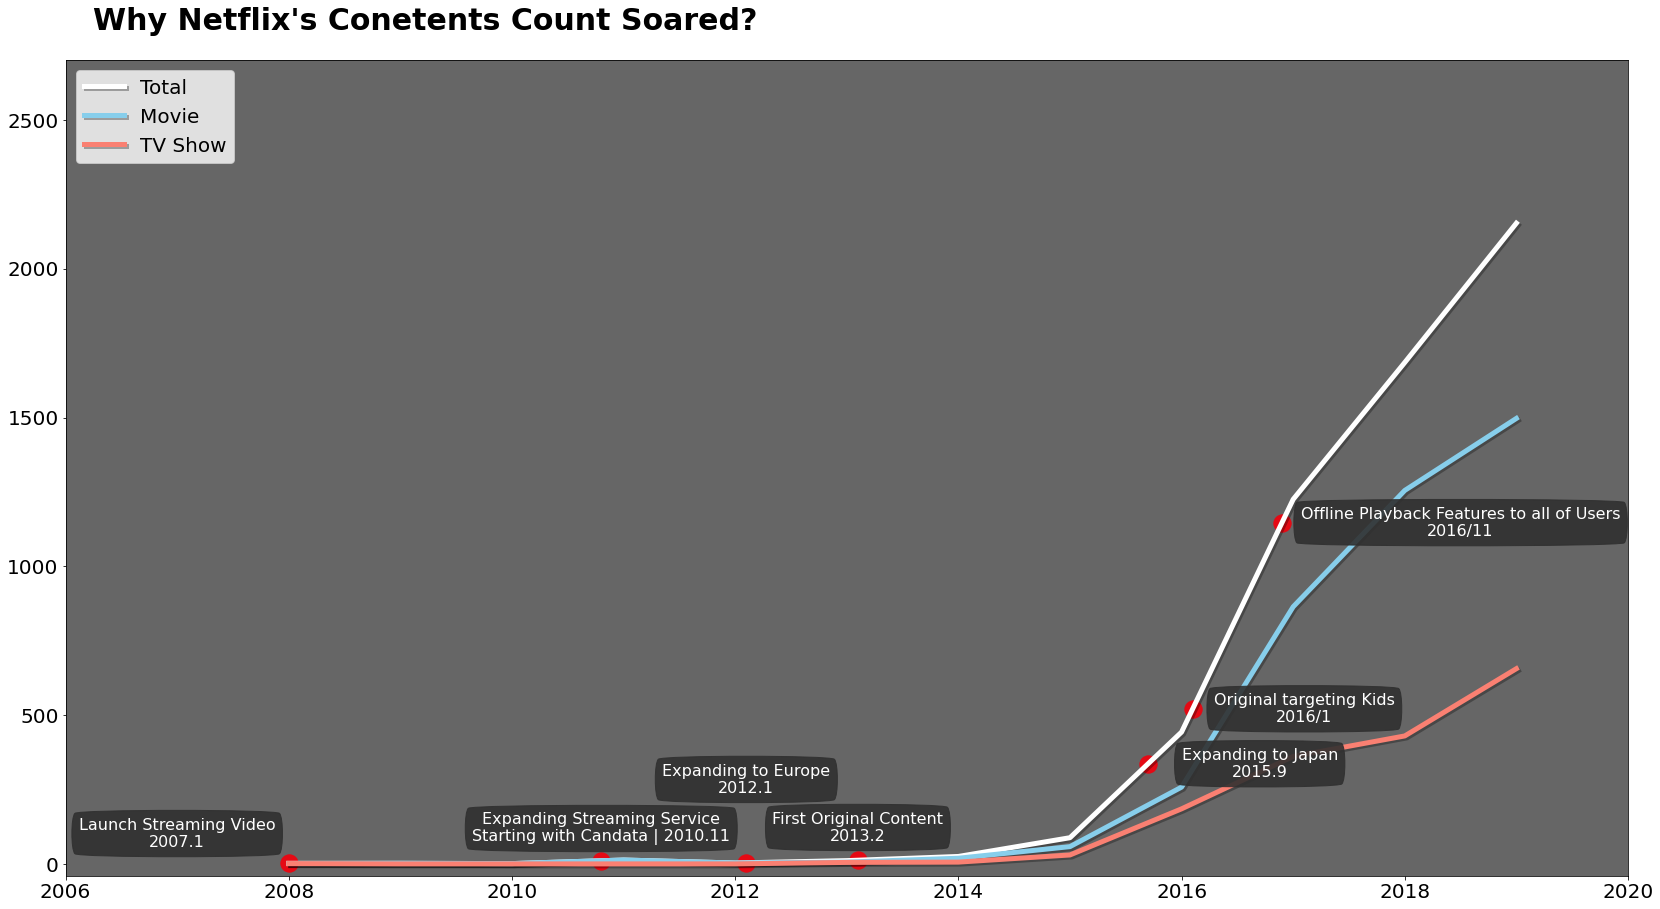

In [106]:
import matplotlib.patheffects as path_effects
year_data = df['year'].value_counts().sort_index().loc[:2019]
type_data = df.groupby('type')['year'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019] 

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(year_data.index, year_data,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='salmon', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

t = [
    2008,
    2010.8,
    2012.1,
    2013.1,
    2015.7,
    2016.1,
    2016.9
]

events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]

up_down = [100, 110, 280, 110, 0, 0, 0]

left_right = [ -1, 0, 0, 0, 1, 1, 1.6 ]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    
    # A proportional expression to draw the middle of the year
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='#E50914', s=300)

ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title("Why Netflix's Conetents Count Soared?", position=(0.23, 1.0+0.03), fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()